## Observations
* The Maximum Temp tends to fall within 20 degrees latitude of the equator.
* Temperature showed to have the highest correlation with coordinates.
* Humidity correlation was small but prevalent.



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)




617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_data = []

#weather_df = pd.DataFrame(columns = city_data)

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

record_num = 1
record_set = 1

for i, city in enumerate(cities) : 
    #Create the query url for the API call
    query_url = f"{base_url}{city}&appid={weather_api_key}"
    
    #API call
    weather_json = requests.get(query_url).json()
    
    
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {city}')
        
        
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        m_temp = weather_json['main']['temp_max']
        hum = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']

        #Create a dataframe to store the data
        city_data.append({'City': city,
                    'Lat': lat, 
                    'Lng': lng,
                    'Max Temp' :m_temp,
                   'Humidity': hum,
                   'Cloudiness': clouds,
                   'Wind_Speed': speed,
                   'Country': country,
                   'Date': date})
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')



-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | pamanukan
Processing Weather Data for Record 2 of Set 1 | tuktoyaktuk
Processing Weather Data for Record 3 of Set 1 | taolanaro
City not found....Skipping............
Processing Weather Data for Record 3 of Set 1 | hobart
Processing Weather Data for Record 4 of Set 1 | knysna
Processing Weather Data for Record 5 of Set 1 | bluff
Processing Weather Data for Record 6 of Set 1 | port elizabeth
Processing Weather Data for Record 7 of Set 1 | punta arenas
Processing Weather Data for Record 8 of Set 1 | vao
Processing Weather Data for Record 9 of Set 1 | kahului
Processing Weather Data for Record 10 of Set 1 | nesbyen
Processing Weather Data for Record 11 of Set 1 | gamay
Processing Weather Data for Record 12 of Set 1 | severo-kurilsk
Processing Weather Data for Record 13 of Set 1 | albany
Processing Weather Data for Record 14 of Set 1 | rikitea
Processing Wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:


#Preview the dataframe
weather_df = pd.DataFrame(city_data)

weather_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,pamanukan,-6.2842,107.8106,77.86,89,99,3.71,ID,1617062380
1,tuktoyaktuk,69.4541,-133.0374,-7.60,77,20,17.27,CA,1617062149
2,hobart,-42.8794,147.3294,61.00,58,0,12.66,AU,1617061791
3,knysna,-34.0363,23.0471,57.20,94,0,3.44,ZA,1617062380
4,bluff,-46.6000,168.3333,60.01,88,100,1.01,NZ,1617061995


In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.198237,21.831050,54.935062,73.199643,52.010695,8.014064,1.617063e+09
std,34.198610,89.711451,24.494232,21.675103,38.442256,5.488369,3.083751e+02
min,-54.800000,-179.166700,-28.550000,6.000000,0.000000,0.490000,1.617062e+09
25%,-8.767600,-55.983600,37.450000,64.000000,12.000000,3.850000,1.617063e+09
50%,27.374700,24.731400,60.800000,78.000000,54.000000,6.910000,1.617063e+09
75%,51.033300,100.404600,75.200000,89.000000,90.000000,11.120000,1.617063e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,32.210000,1.617063e+09


In [8]:
clean_city_data = weather_df.query('Humidity < 100')

clean_city_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,20.960597,20.932672,54.953706,72.412844,51.500917,7.993248,1.617063e+09
std,34.203715,90.122024,24.694079,21.491453,38.567222,5.478916,3.092551e+02
min,-54.800000,-179.166700,-28.550000,6.000000,0.000000,0.490000,1.617062e+09
25%,-8.897800,-57.752800,37.400000,63.000000,11.000000,3.830000,1.617063e+09
50%,27.099800,24.731400,60.800000,77.000000,53.000000,6.910000,1.617063e+09
75%,50.852300,100.335400,75.330000,89.000000,90.000000,11.030000,1.617063e+09
max,78.218600,179.316700,89.600000,99.000000,100.000000,32.210000,1.617063e+09


In [9]:
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot


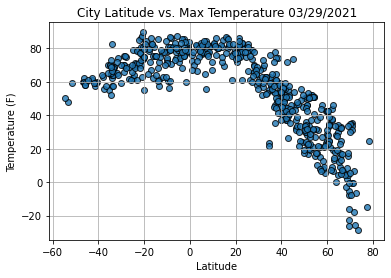

In [10]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Max Temp"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Temperature (F).png")

plt.show()

## Latitude vs. Humidity Plot

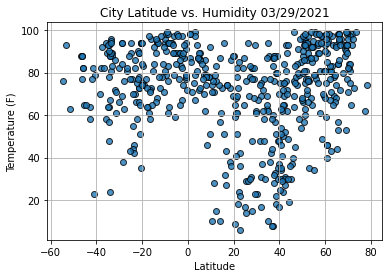

In [11]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Humidity"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Humidity (F).png")

plt.show()

## Latitude vs. Cloudiness Plot

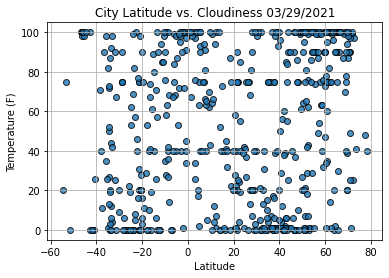

In [12]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Cloudiness"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness (F).png")

plt.show()

## Latitude vs. Wind Speed Plot

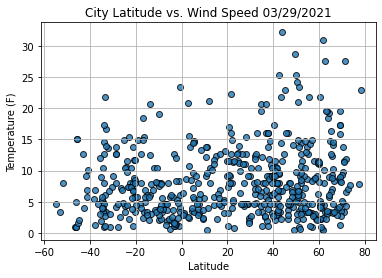

In [13]:
plt.scatter(clean_city_data["Lat"],
            clean_city_data["Wind_Speed"],
            edgecolor="black",linewidths=1,marker="o",
            alpha=0.8, label="Cities")

plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed (F).png")

plt.show()

## Linear Regression

In [14]:
northern_hem = clean_city_data.query('Lat > 0 and Lng > 0')

northern_hem.describe()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02
mean,41.715792,79.885804,43.811806,74.305556,59.657407,7.100880,1.617063e+09
std,20.856320,45.274083,26.830582,22.823268,37.449417,4.785581,2.672190e+02
min,0.741400,1.386200,-28.550000,10.000000,0.000000,0.510000,1.617062e+09
25%,25.435675,42.908500,24.015000,68.750000,25.000000,3.440000,1.617063e+09
50%,46.132450,78.233350,43.510000,81.000000,66.000000,6.170000,1.617063e+09
75%,59.592625,118.061725,67.545000,92.250000,99.000000,9.652500,1.617063e+09
max,78.218600,179.316700,85.300000,99.000000,100.000000,30.980000,1.617063e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7755628659360237


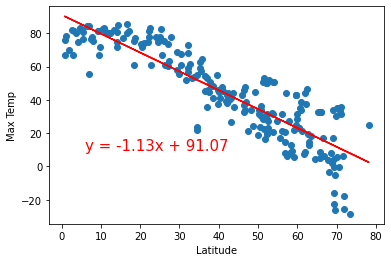

In [15]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("NH_Max Temp vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
southern_hem = clean_city_data.query('Lat < 0 and Lng < 0')

southern_hem.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01
mean,-22.341210,-71.024612,70.791186,80.050847,37.457627,7.425593,1.617063e+09
std,13.705409,34.095207,9.031824,12.724432,30.793149,4.712302,3.103343e+02
min,-54.800000,-175.200000,48.200000,23.000000,0.000000,1.010000,1.617062e+09
25%,-32.522200,-73.583350,65.125000,73.000000,7.000000,4.160000,1.617062e+09
50%,-21.207800,-63.040800,71.600000,82.000000,40.000000,6.710000,1.617063e+09
75%,-9.990700,-52.046800,78.710000,89.500000,67.500000,9.630000,1.617063e+09
max,-0.739300,-34.833900,86.000000,98.000000,90.000000,20.710000,1.617063e+09


The r-squared is: 0.5973035054576311


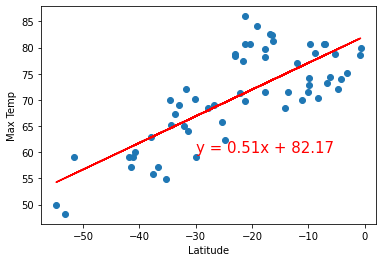

In [17]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Max Temp vs. Latitude Linear Regression.png")



plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The r-squared is: 0.14731544653046055


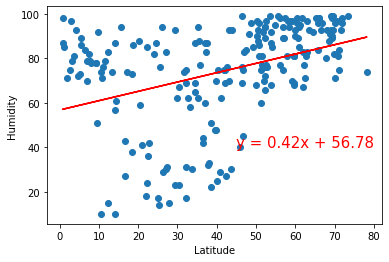

In [18]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Humidity vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09760111757063346


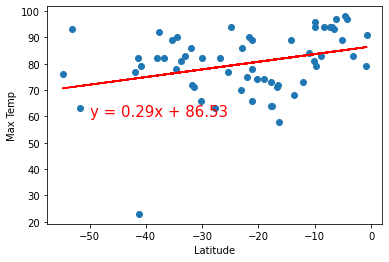

In [19]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Humidity vs. Latitude Linear Regression.png")


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0542969281290757


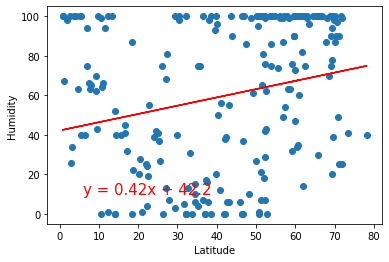

In [20]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Cloudiness vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03745177581865282


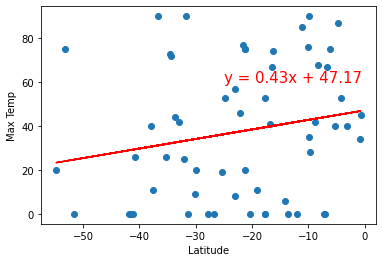

In [21]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Cloudiness vs. Latitude Linear Regression.png")


plt.show()

The r-squared is: 0.001613737696727424


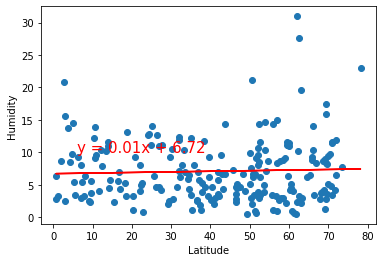

In [22]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" NH-Wind_speed vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005218264988365752


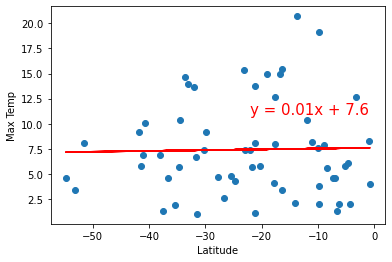

In [23]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-22,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(" SH-Wind_speed vs. Latitude Linear Regression.png")



plt.show()